## About Datasets

**Context**

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

**Goal**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of '*good*' or '*bad*' is not given. You should use some techique, such as [vintage analysis][1] to construct you label. Also, unbalance data problem is a big problem in this task.

[1]: <https://www.kaggle.com/code/rikdifos/eda-vintage-analysis/notebook> "kaggle notebook"

**Details**

<table>
<thead>
<tr>
<th>application_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>CODE_GENDER</code></td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_CAR</code></td>
<td>Is there a car</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_REALTY</code></td>
<td>Is there a property</td>
<td></td>
</tr>
<tr>
<td><code>CNT_CHILDREN</code></td>
<td>Number of children</td>
<td></td>
</tr>
<tr>
<td><code>AMT_INCOME_TOTAL</code></td>
<td>Annual income</td>
<td></td>
</tr>
<tr>
<td><code>NAME_INCOME_TYPE</code></td>
<td>Income category</td>
<td></td>
</tr>
<tr>
<td><code>NAME_EDUCATION_TYPE</code></td>
<td>Education level</td>
<td></td>
</tr>
<tr>
<td><code>NAME_FAMILY_STATUS</code></td>
<td>Marital status</td>
<td></td>
</tr>
<tr>
<td><code>NAME_HOUSING_TYPE</code></td>
<td>Way of living</td>
<td></td>
</tr>
<tr>
<td><code>DAYS_BIRTH</code></td>
<td>Birthday</td>
<td>Count backwards from current day (0), -1 means yesterday</td>
</tr>
<tr>
<td><code>DAYS_EMPLOYED</code></td>
<td>Start date  of employment</td>
<td>Count backwards from current day(0). If  positive, it means the person currently unemployed.</td>
</tr>
<tr>
<td><code>FLAG_MOBIL</code></td>
<td>Is there a mobile   phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_WORK_PHONE</code></td>
<td>Is there a work phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_PHONE</code></td>
<td>Is there a phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_EMAIL</code></td>
<td>Is there an email</td>
<td></td>
</tr>
<tr>
<td><code>OCCUPATION_TYPE</code></td>
<td>Occupation</td>
<td></td>
</tr>
<tr>
<td><code>CNT_FAM_MEMBERS</code></td>
<td>Family size</td>
<td></td>
</tr>
</tbody>
</table>

<br></br>

<table>
<thead>
<tr>
<th>credit_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>MONTHS_BALANCE</code></td>
<td>Record month</td>
<td>The month of the extracted data is the starting point,  backwards, 0 is the current month, -1 is the previous month,  and so on</td>
</tr>
<tr>
<td><code>STATUS</code></td>
<td>Status</td>
<td>0: 1-29 days past due 1: 30-59 days past due   2: 60-89 days overdue 3: 90-119 days overdue    4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days    C: paid off that month X: No loan for the month</td>
</tr>
</tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
APPLI = os.path.join(os.getcwd(), 'data', 'application_record.csv')
CREDIT = os.path.join(os.getcwd(), 'data', 'credit_record.csv')

In [3]:
df = pd.read_csv(APPLI)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df2 = pd.read_csv(CREDIT)
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
# how many IDs do two tables share?
len(set(df['ID']).intersection(set(df2['ID'])))

36457

In [6]:
df_credit = df2[df2.MONTHS_BALANCE==0]
df_credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
23,5001713,0,X
45,5001714,0,X
60,5001715,0,X
...,...,...,...
1048451,5150481,0,X
1048512,5150483,0,X
1048530,5150484,0,C
1048543,5150485,0,0


In [7]:
# how many IDs do two tables share?
len(set(df['ID']).intersection(set(df2['ID'])))

36457

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

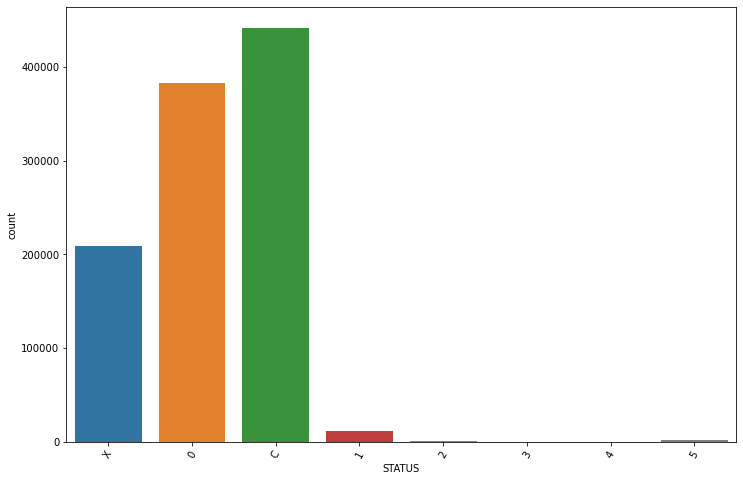

In [9]:
plt.subplots(figsize=(12, 8))
sns.countplot(x=df2.STATUS)
plt.xticks(rotation=60)
plt.show()

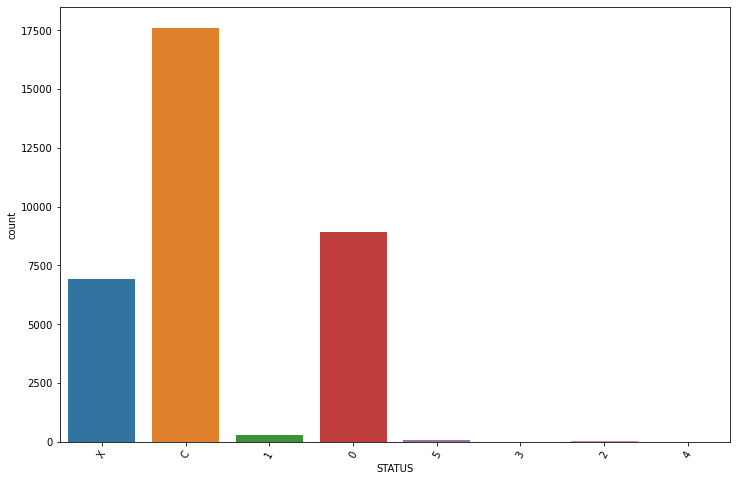

In [10]:
plt.subplots(figsize=(12, 8))
sns.countplot(x=df_credit.STATUS)
plt.xticks(rotation=60)
plt.show()

In [11]:
df2.STATUS.value_counts().sort_values()

4       223
3       320
2       868
5      1693
1     11090
X    209230
0    383120
C    442031
Name: STATUS, dtype: int64

In [12]:
df_credit.STATUS.value_counts().sort_values()

4        5
3        6
2       19
5       65
1      309
X     6925
0     8914
C    17613
Name: STATUS, dtype: int64

In [13]:
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [14]:
df_pivot = pd.pivot(
    df2,
    index='ID',
    values='STATUS',
    columns='MONTHS_BALANCE'
)

df_pivot.reset_index(inplace=True)
df_pivot['window'] = df_pivot.isna().sum(axis=1)
df_pivot

MONTHS_BALANCE,ID,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,-8,-7,-6,-5,-4,-3,-2,-1,0,window
0,5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,X,57
1,5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,42
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,39
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,46
4,5001715,NaN,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43
45981,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,43
45982,5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,C,48
45983,5150485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,59


In [15]:
df_pivot = df_pivot[df_pivot.window > 20]
df_pivot['due_count'] = np.where((df_pivot.iloc[:, 1:-1]=='0') | (df_pivot.iloc[:, 1:-1]=='1') | (df_pivot.iloc[:, 1:-1]=='2') | (df_pivot.iloc[:, 1:-1]=='3') | (df_pivot.iloc[:, 1:-1]=='4') | (df_pivot.iloc[:, 1:-1]=='5'), 1, 0).sum(axis=1)
df_pivot

C:\Users\isaac\AppData\Local\Temp\ipykernel_16740\298813286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['due_count'] = np.where((df_pivot.iloc[:, 1:-1]=='0') | (df_pivot.iloc[:, 1:-1]=='1') | (df_pivot.iloc[:, 1:-1]=='2') | (df_pivot.iloc[:, 1:-1]=='3') | (df_pivot.iloc[:, 1:-1]=='4') | (df_pivot.iloc[:, 1:-1]=='5'), 1, 0).sum(axis=1)


MONTHS_BALANCE,ID,-60,-59,-58,-57,-56,-55,-54,-53,-52,...,-7,-6,-5,-4,-3,-2,-1,0,window,due_count
0,5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,X,57,3
1,5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,42,10
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,39,0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,46,0
5,5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,C,C,C,C,C,39,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,12
45981,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,43,0
45982,5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,C,48,12
45983,5150485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,59,2


In [16]:
sum(df_pivot.due_count > 7)

16135

In [17]:
df_clean = pd.merge(df, df_pivot[['ID', 'window', 'due_count']], on='ID', how='inner')
df_clean['bad_cus'] = np.where(df_clean.due_count > df_clean.due_count.median(), 1, 0)
df_clean

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,window,due_count,bad_cus
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,45,2,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,46,2,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,31,7,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,56,2,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,49,4,0
31506,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,37,19,1
31507,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,28,19,1
31508,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,51,10,1


<AxesSubplot: xlabel='bad_cus', ylabel='count'>

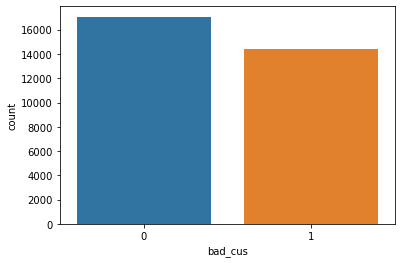

In [18]:
sns.countplot(x=df_clean.bad_cus)

In [19]:
CASE1 = os.path.join(os.getcwd(), 'data', 'case_1.csv')
df_clean.to_csv(CASE1, index=False)

In [20]:
import caseData

In [21]:
df_caseOne = caseData.data(application=df, credit=df2)
df_test = df_caseOne.caseOne()

In [22]:
df_test

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,window,due_count,bad_cus
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,45,2,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,46,2,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,31,7,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,56,2,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,49,4,0
31506,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,37,19,1
31507,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,28,19,1
31508,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,51,10,1
